In [1]:
import numpy as np 
from numpy.linalg import svd
import matplotlib.pyplot as plt
import pylayers.util.geomutil as geu
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

On créé un ensemble de $N$ points aléatoire, ensuite on centre ce nuage de point et on lui applique une rotation $M$. On dispose donc de deux nuages centrés : $\mathbf{p}_1\;\; (N,3) $ et un nuage isomorphe $\mathbf{p}_2 \;\;(N,3)$. 

$$\mathbf{p_2}=\mathbf{p_1}.\mathbf{M}$$ 

In [107]:
np.random.permutation(200)

array([ 58,  40,  34, 102, 184, 198,  95,   4,  29, 168, 171,  18,  11,
        89, 110, 118, 159,  35, 136,  59,  51,  16,  44,  94,  31, 162,
        38,  28, 193,  27,  47, 165, 194, 177, 176,  97, 174,  73,  69,
       172, 108, 107, 189,  14,  56,  19, 114,  39, 185, 124,  98, 123,
       119,  53,  33, 179, 181, 106, 199, 138, 116,  67,  78,  42,  17,
         5, 127, 105,  48,  66,  54,  84, 183, 158, 166, 113,  12, 117,
        93, 120, 154,  90,  81, 122, 191,  13,  82, 132, 187,  45,  99,
        36, 161, 186, 153, 103, 195, 197, 148, 173,  75,  21,  91, 152,
         2,  70,  85, 150,   6, 112,   0, 155,  77,  65,  55, 167,  88,
       130,  46,  62,  74,  92, 147, 160, 143,  87, 180, 145, 164,  10,
        32,  83, 182, 100, 125,  23, 126,   9, 170, 104, 151, 135, 111,
       188,  64,  15,  41, 163, 109,  80,  52,  26,  76,  43,  24,   3,
       169,  49, 149, 131, 190,  30, 121, 115, 175,   8,  60, 128,   1,
        57,  22,  61,  63,   7, 196, 141,  86,  96,  68,  50, 14

In [108]:
N = 200 
np.random.seed(1)
t = np.linspace(0,2*np.pi,N)
x = 10*np.cos(t)[None,:]
y = 20*np.sin(t)[None,:]
z = 30*(1-t/np.pi)[None,:]
p1 = np.vstack((x,y,z)).T
ptm=np.mean(p1,axis=0)
p1 = p1 - ptm
M = geu.MEulerAngle(10,2.4,.24)
p2 = np.dot(pts1,M.T)

En appliquant une décomposition en valeurs singulières à chacun de ses nuages de points. On obtient les décompositions suivantes: 

$$\mathbf{p_1} = \mathbf{U_1}\mathbf{S_1}\mathbf{V}_1$$
$$\mathbf{p_2} = \mathbf{U_2}\mathbf{S_2}\mathbf{V}_2$$

On pose :

$$\mathbf{q}_1 = \mathbf{U_1}\mathbf{S_1}$$
$$\mathbf{q}_2 = \mathbf{U_2}\mathbf{S_2}$$
$\mathbf{q}_1$ et $\mathbf{q}_2$ sont des nuages de points de même dimensions que les nuages d'origine
 $\mathbf{p}_1$ et $\mathbf{p}_2$

Ces nuages s'expriment:
$$\mathbf{p}_1=\mathbf{q}_1 \mathbf{V}_1$$
$$\mathbf{p}_2=\mathbf{q}_2 \mathbf{V}_2$$

In [109]:
U1,S1,V1=svd(p1)
U2,S2,V2=svd(p2)

Les signatures $S_1$ et $S_2$ sont identiques mais les nuages d'arrivée peuvent être différents ( à 1,2 ou 3 symmétries près) 

In [110]:
print S1
print S2

[ 299.33643678  103.92647733  100.24719447]
[ 299.33643678  103.92647733  100.24719447]


Ici on constate que les nuages d'arrivée sont différents. On consate l'apparition d'une symétrie selon l'axe $x$

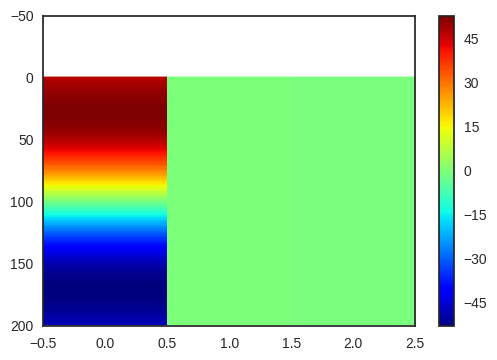

In [111]:
plt.imshow(q1-q2,cmap='jet',interpolation='nearest')
plt.axis('auto')
plt.colorbar()

Après constatation de l'axe de symmétrie. On construit la matrice de symmétrie.

In [112]:
Sx = np.zeros((3,3))
Sx[0,0]=-1
Sx[1,1]=1
Sx[2,2]=1
print(Sx)

[[-1.  0.  0.]
 [ 0.  1.  0.]
 [ 0.  0.  1.]]


In [113]:
q1 = np.dot(U1[:,0:3],np.diag(S1))
q2 = np.dot(U2[:,0:3],np.diag(S2))

In [114]:
q1s=np.dot(q1,Sx)

In [115]:
S2

array([ 299.33643678,  103.92647733,  100.24719447])

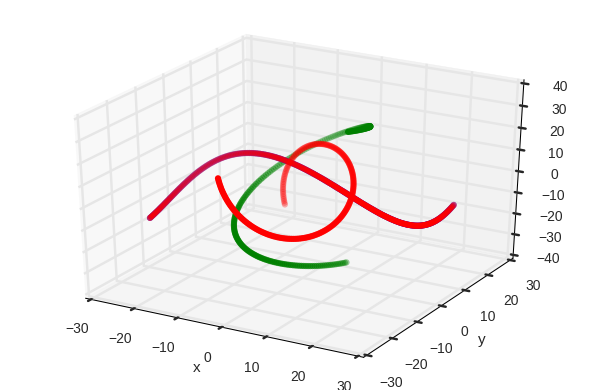

In [116]:
fig1 = plt.figure()
ax1 = fig1.add_subplot(111,projection='3d')
ax1.scatter(p1[:,0],p1[:,1],p1[:,2],s=20,c='g',linewidth=0)
ax1.scatter(p2[:,0],p2[:,1],p2[:,2],s=20,c='r',linewidth=0)
ax1.scatter(q2[:,0],q2[:,1],q2[:,2],s=20,c='b',linewidth=0)
ax1.scatter(q1s[:,0],q1s[:,1],q1s[:,2],s=20,c='r',linewidth=0)
plt.xlabel('x')
plt.ylabel('y')
plt.tight_layout()

In [84]:
np.linalg.det(V2)

-1.0000000000000002

On est bon à une symmétrie près

In [85]:
V2

array([[ 0.36855285, -0.91579438,  0.15965414],
       [-0.22337787,  0.07946697,  0.97148717],
       [ 0.90236973,  0.39370757,  0.17528042]])

In [86]:
M

array([[-0.90236973, -0.40115775, -0.1574844 ],
       [-0.39370757,  0.61872607,  0.67983263],
       [-0.17528042,  0.67546318, -0.71625852]])